# Modified K-Means (K-Means++)
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
#df = pd.read_csv('../../dataset/student_lifestyle_100k.csv')
df = pd.read_csv('../../dataset/tanzil.csv')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].fillna(df[numeric_cols].mean()).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

print(f'Data shape: {X_scaled.shape}')

Data shape: (1017, 8)


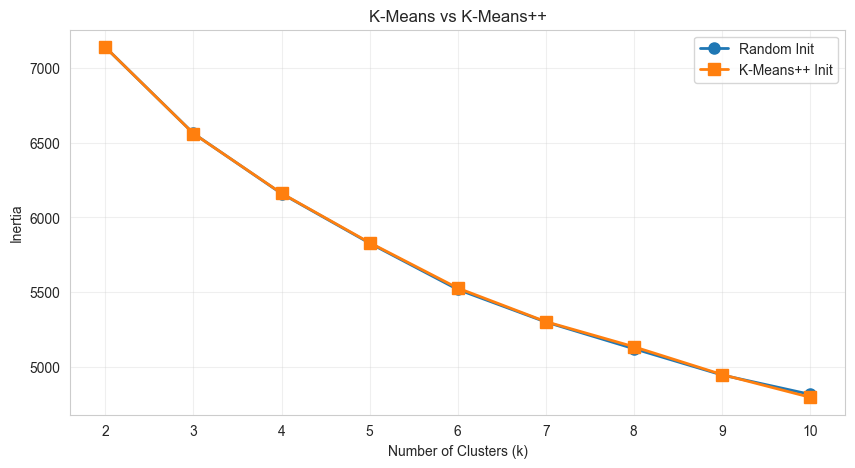

In [5]:
inertias_random = []
inertias_pp = []
K_range = range(2, 11)

for k in K_range:
    km_random = KMeans(n_clusters=k, init='random', random_state=42, n_init=10)
    km_random.fit(X_scaled)
    inertias_random.append(km_random.inertia_)
    
    km_pp = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km_pp.fit(X_scaled)
    inertias_pp.append(km_pp.inertia_)

optimal_k = 5

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias_random, 'o-', label='Random Init', linewidth=2, markersize=8)
plt.plot(K_range, inertias_pp, 's-', label='K-Means++ Init', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means vs K-Means++')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [6]:
kmeans_pp = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
labels = kmeans_pp.fit_predict(X_scaled)

print(f'Silhouette Score: {silhouette_score(X_scaled, labels):.4f}')
print(f'Inertia: {kmeans_pp.inertia_:.2f}')

Silhouette Score: 0.1006
Inertia: 5831.08


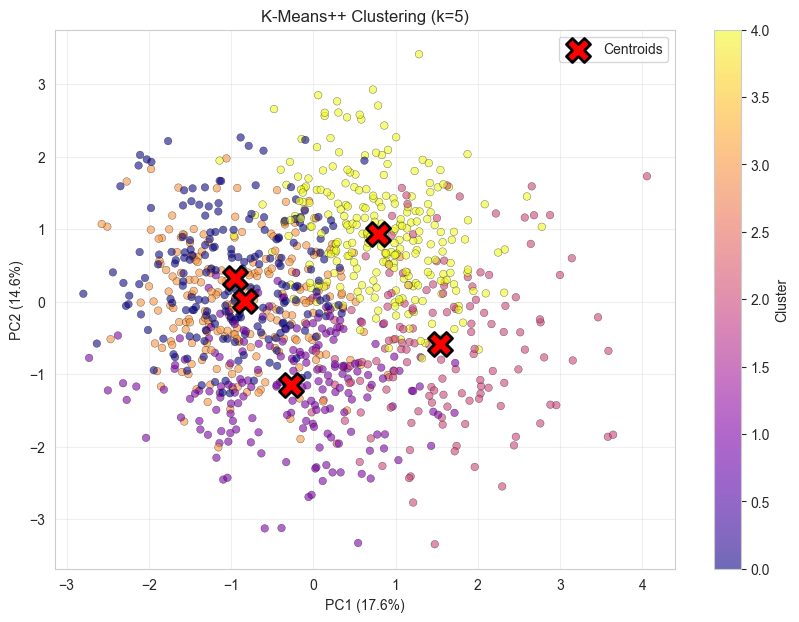

In [7]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='plasma', 
                       s=30, alpha=0.6, edgecolors='black', linewidth=0.3)
centers_2d = pca.transform(kmeans_pp.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=300, 
            edgecolors='black', linewidth=2, label='Centroids')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title(f'K-Means++ Clustering (k={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(alpha=0.3)
plt.show()